In [ ]:
Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [8]:
import numpy as np
a = np.random.random((3,10));
print(a)

[[0.41760445 0.52576117 0.35747384 0.96004355 0.91486775 0.91385567
  0.03666038 0.38772772 0.30230133 0.46579675]
 [0.51663477 0.35773346 0.39627841 0.20677648 0.75539485 0.96666349
  0.96433141 0.72630233 0.13953828 0.87637577]
 [0.28774118 0.98426157 0.29841236 0.35708998 0.19208769 0.07058729
  0.44524738 0.71756289 0.73249051 0.94832934]]


In [36]:
b = a - 0.5;
b = np.absolute(b);
args = np.argmin(b, axis=1);
st=[0,1,2];
print(a[st,args])

[0.52576117 0.51663477 0.44524738]


In [ ]:
Создайте двумерный массив 6x6, заполненный случайными значениями.
Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [1]:
import numpy as np
a = np.random.random((6,6));
print(a)
b = np.sum(a,axis=1)/np.min(a,axis=0);
print(b)

[[0.39984266 0.16799413 0.07355616 0.14715535 0.32201397 0.17788997]
 [0.42938769 0.79945199 0.54065155 0.45527854 0.23425806 0.38698653]
 [0.17176076 0.92518328 0.15679707 0.0342448  0.6492846  0.28129351]
 [0.32052538 0.8302117  0.32485533 0.31417809 0.52173251 0.13670344]
 [0.79930601 0.86593882 0.16729651 0.08046834 0.90450752 0.22917831]
 [0.10026809 0.0183507  0.59140826 0.67418318 0.6753187  0.31048283]]
[ 12.85007289 155.09023196  30.16149954  71.49134242  13.00572335
  17.33688507]


In [ ]:
На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [2]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]);
f = x==0
f[1:9]=f[0:8]
f[0] = False
print(np.max(x[f]))

5


In [ ]:
Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). 
Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. 
В случае, если некоторый индекс встретился в массиве i несколько раз, 
прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [3]:
import numpy as np
x = np.ones(10);
i = np.array([0, 1, 2, 3, 5, 5, 5, 8]);
j = np.unique(i);
for k in j:
    t = np.count_nonzero(i == k)
    x[k] = x[k] + t;
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [ ]:
Написать функцию, реализующую алгоритм k-means. 
Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html.
Функция должна содержать не более двух циклов while (for).

3
[[1.7        2.4       ]
 [0.78333333 1.2       ]
 [0.1        0.1       ]]
0.0


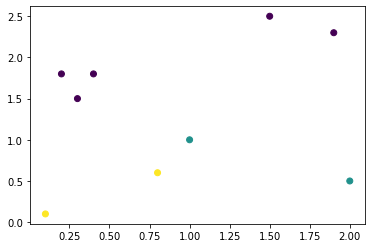

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1.9, 2.3],[1.5, 2.5],[0.8, 0.6],[0.4, 1.8],[0.1, 0.1],[0.2, 1.8],[2.0, 0.5],[0.3, 1.5],[1.0, 1.0]])

num_cluster = int(input())
def kmeans(obs, num_cluster, iterations = 20, thresh = 1e-05):
    DIM = 2
    N = obs.shape[0]

    x = obs
    y = np.zeros(N)
    k = np.arange(0, num_cluster, 1)
    k1 = np.arange(0, N, 1)
    s1 = 0
    s2 = 0
    t = 0
    

    while(abs(s2 - s1) > thresh or t < iterations):
        
        if (t != 0):
            u = list(map(lambda m: ((mean[m,0])**2 + (mean[m,1])**2)**(1/2), k))
            s1 = (np.sum(u))
        
        if t == 0:
            index_ = np.random.choice(range(N), num_cluster, replace=False)
            mean = np.array(x[index_])
        else:
            mean = np.array(list(map(lambda m: np.mean(x[y==m], axis=0), k)))
        
        for i in range(N):
            dist = np.sum((mean - x[i])**2, axis=1)
            pred = np.argmin(dist)
            y[i] = pred
        
        u = list(map(lambda m: ((mean[m,0])**2 + (mean[m,1])**2)**(1/2), k))
        s2 = (np.sum(u))
        
        t = t + 1
    return([mean, abs(s2-s1), x, y])
    

print(kmeans(data, num_cluster)[0])
print(kmeans(data, num_cluster)[1])
plt.scatter(kmeans(data, num_cluster)[2][:,0], kmeans(data, num_cluster)[2][:,1], c = kmeans(data, num_cluster)[3])
plt.show()